<a href="https://colab.research.google.com/github/welashi/ANN/blob/main/nn3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Распознавание рукописных цифр

Воспользуемся выборкой из уже подготовленной БД изображений:

MNIST – (Modified National Institute of Standards and Technology)

60 000 изображений в обучающей выборке и 10 000 – в тестовой.
Каждое изображение имеет размер 28х28 пикселей и представлено в градациях серого, т.е. каждый пиксел имеет значение от 0 до 255 (0 – черный цвет, 255 – белый):

* x_train – изображения цифр обучающей выборки;
* y_train – вектор соответствующих значений цифр (например, если на i-м изображении нарисована 5, то  y_train[i] = 5);
* x_test – изображения цифр тестовой выборки;
* y_test – вектор соответствующих значений цифр для тестовой выборки.

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


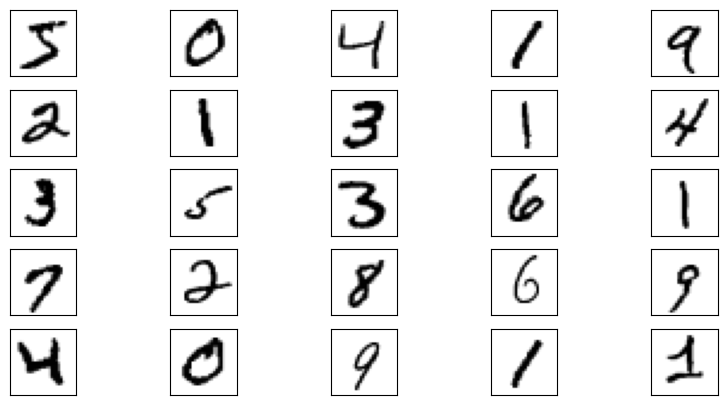

In [3]:
# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

Соберем обычную полносвязную ИНС с
* 28 x 28 = 784 входами;
* 128 нейронами скрытого слоя + bias;
* 10 нейронами выходного слоя + bias.

In [4]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

print(model.summary())     # вывод структуры НС в консоль

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### Cтандартизация входных данных
каждое значение тензоров x_train и x_test будет делиться на максимальное число 255, которое они могут принимать. На выходе получим вещественные величины от 0 до 1.

In [5]:
x_train = x_train / 255
x_test = x_test / 255

На выходе ожидаем вектор с 1 на месте соответствующего числа, т.к. наша НС имеет 10 выходов, и каждый выход будет соответствовать определенной цифре: от 0 до 9.

Воспользуемся стандартной функцией Keras:

In [6]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Для задачи классификации стоит выбрать функцию потерь категориальной кросс-энтропии - categorical_crossentropy.

Построить алгоритм минимизации процента ошибок распознавания цифр сложно (если вообще возможно), поэтому мы привязываемся к более простому с точки зрения математики критерию – категориальной кросс-энтропии (S), минимизируя которую, надеемся, что будет уменьшаться и процент ошибок.
$${Q(S(y), L)=-\sum_i(L_i*log(S_i))}$$



In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Обучим модель
* batch_size = 32 – это размер батча (32 картинки), после которых будет выполняться корректировка весов;
* validation_split = 0,2 – разбиение обучающей выборки на собственно обучающую и проверочную. Значение 0,2 определяет, что для каждой эпохи 20% случайных картинок из обучающей выборки будут помещаться в выборку валидации.

In [8]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2872 - accuracy: 0.9189 - val_loss: 0.1580 - val_accuracy: 0.9528
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1282 - accuracy: 0.9625 - val_loss: 0.1167 - val_accuracy: 0.9638
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0887 - accuracy: 0.9736 - val_loss: 0.0965 - val_accuracy: 0.9702
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0675 - accuracy: 0.9797 - val_loss: 0.0987 - val_accuracy: 0.9706
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0497 - accuracy: 0.9850 - val_loss: 0.0862 - val_accuracy: 0.9741
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0401 - accuracy: 0.9879 - val_loss: 0.0912 - val_accuracy: 0.9737
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0306 - accuracy: 0.9904 - val_loss: 0.0975 - val_accuracy:

Проверка

In [9]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0885 - accuracy: 0.9745


[0.08850552886724472, 0.9745000004768372]

Контроль по примеру

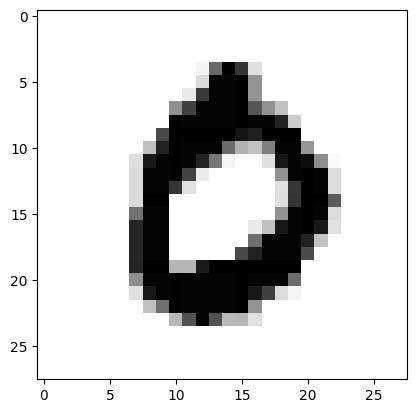

In [10]:
n = 3
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [11]:
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )

1/1 [==============================] - 0s 92ms/step
[[9.9999475e-01 1.5459682e-11 3.7899540e-08 9.3903485e-10 1.5803881e-08
  2.4509286e-09 2.4249575e-06 2.6991618e-06 2.5280394e-13 2.4209346e-08]]


In [12]:
print( np.argmax(res) )

0


Пропустим через НС всю тестовую выборку и векторы выходных значений преобразуем в числа от 0 до 9:

In [13]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

313/313 [==============================] - 1s 3ms/step
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


# Все ли картинки распознаются верно?

Затем, сформируем маску, которая будет содержать True для верных вариантов и False – для неверных. И с помощью этой маски выделим из тестовой выборки все неверные результаты:

In [14]:
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = x_test[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True]
(255, 28, 28)


И выведем первые 5 из них на экран:

Значение сети: 7


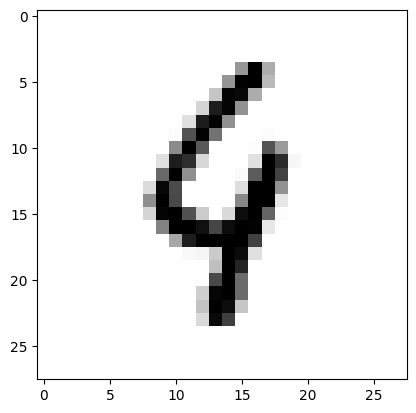

Значение сети: 2


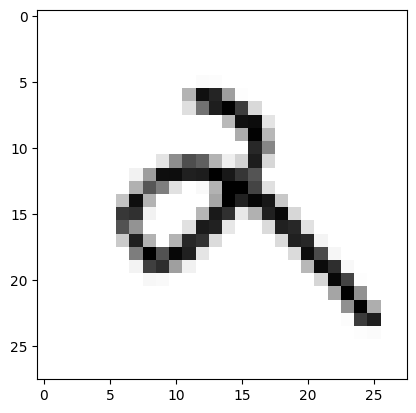

Значение сети: 1


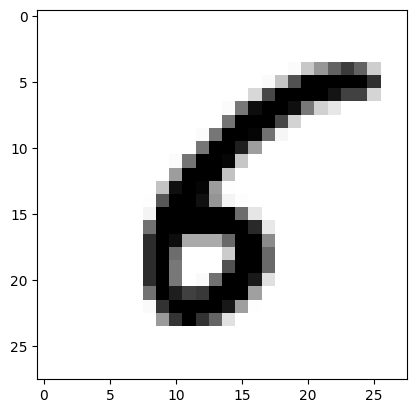

Значение сети: 0


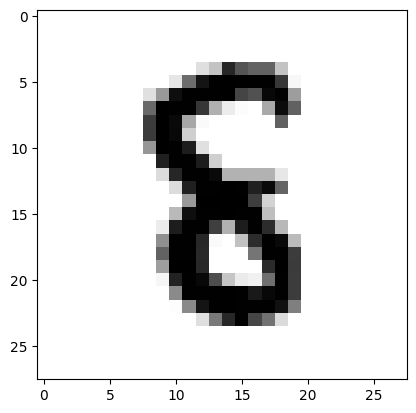

Значение сети: 4


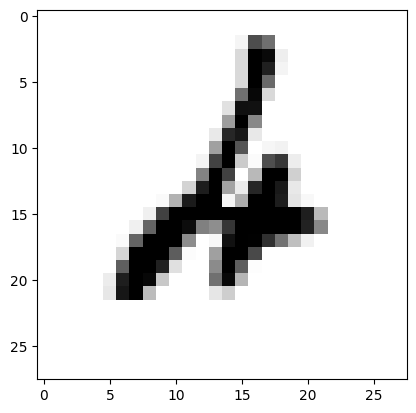

In [15]:
for i in range(5):
  print("Значение сети: "+str(y_test[i]))
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()